## Final Project Submission

Please fill out:
* Student name: Kennedy Juma
* Student pace:full time
* Scheduled project review date/time: 24/05/2023
* Instructor name: Antony Muiko
* Blog post URL:


## Syriatel Telco Churn Rate Analysis

Syriatel is a telecommunications company operating in Syria, and they are currently working on reducing their churn rate. Churn rate refers to the number of customers who unsubscribe or discontinue a specific service over a given period of time. Syriatel aims to focus on improving their phone service sector while keeping the internet services separate for now.

The goals of this study are as follows:

* Develop a model that minimizes customer churn without Syriatel being aware of their intention to churn.

* Identify the key factors that contribute to a higher churn rate.

By achieving these goals, Syriatel will be able to segment their customer base and implement targeted strategies to improve user retention.

The analysis involves the use of four different classification models: Naive Bayes, Decision Tree Classifier, Random Forest, and Logistic Regression. The notebook is organized into the following sections:

* Exploratory Data Analysis (EDA)
* Baseline Modeling
* Optimization of three Classification Models
* Performance Evaluation
* Findings and Feature Importance of the winning model

In the EDA section, various graphs and visualizations are presented to provide insights.

## Data Preparation

In [5]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

# Model Evaluation Metrics

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.metrics import roc_curve, confusion_matrix, precision_score

# Data Splitting

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Machine Learning Algorithms

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



## Loading the Data

In [6]:
# importing initial dataset
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

## Data Exploration

In [7]:
# Displaying DataFrame information
data.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

In [8]:
# Displaying the first few rows of the dataset
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [9]:
# Checking the dimensions of the dataset
data.shape


(3333, 21)

In [10]:
# Checking the data types of the columns
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [11]:
# Checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [12]:
# Checking if customers have single number
data['phone number'].nunique()

3333

## Data Cleaning and EDA

In [13]:
def clean_data(df):
    """
    Cleans the given DataFrame.

    Parameters:
    - df: DataFrame

    Returns:
    - None
    """
    # Drop the 'phone number', 'area code', and 'state' columns as they are not needed for analysis
    df.drop(['phone number', 'area code', 'state'], axis=1, inplace=True)

    # Convert non-numerical columns to categorical
    categorical_cols = ['international plan', 'voice mail plan']
    label_encoder = preprocessing.LabelEncoder()
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])

clean_data(data)


In [14]:
# Statistical summary of the dataset
data.describe()

account length  international plan  voice mail plan  \
count     3333.000000         3333.000000      3333.000000   
mean       101.064806            0.096910         0.276628   
std         39.822106            0.295879         0.447398   
min          1.000000            0.000000         0.000000   
25%         74.000000            0.000000         0.000000   
50%        101.000000            0.000000         0.000000   
75%        127.000000            0.000000         1.000000   
max        243.000000            1.000000         1.000000   

       number vmail messages  total day minutes  total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total day charge  total eve minutes  total eve calls  total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000          0.000000   
25%           24.430000         166.600000        87.000000         14.160000   
50%           30.500000         201.400000       100.000000         17.120000   
75%           36.790000         235.300000       114.000000         20.000000   
max           59.640000         363.700000       170.000000         30.910000   

       total night minutes  total night calls  total night charge  \
count          3333.000000        3333.000000         3333.000000   
mean            200.872037         100.107711            9.039325   
std              50.573847          19.568609            2.275873   
min              23.200000          33.000000            1.040000   
25%             167.000000          87.000000            7.520000   
50%             201.200000         100.000000            9.050000   
75%             235.300000         113.000000           10.590000   
max             395.000000         175.000000           17.770000   

       total intl minutes  total intl calls  total intl charge  \
count         3333.000000       3333.000000        3333.000000   
mean            10.237294          4.479448           2.764581   
std              2.791840          2.461214           0.753773   
min              0.000000          0.000000           0.000000   
25%              8.500000          3.000000           2.300000   
50%             10.300000          4.000000           2.780000   
75%             12.100000          6.000000           3.270000   
max             20.000000         20.000000           5.400000   

       customer service calls  
count             3333.000000  
mean                 1.562856  
std                  1.315491  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  9.000000

 There doesn't seem to be any outliers as the minimum and maximum values for these columns fall within a reasonable range.

In [15]:
# Analyzing the target variable - 'churn'
data['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

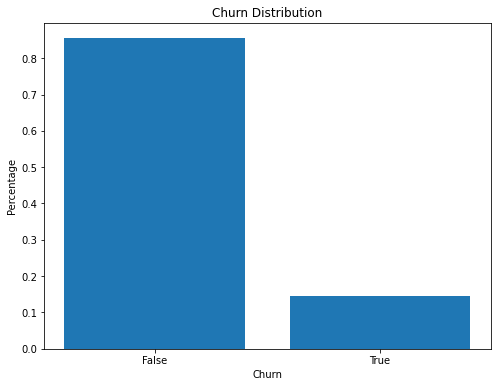

Overall Churn rate is  14.49 %


In [16]:
# Analyzing the target variable - 'churn'
churn_counts = data['churn'].value_counts(normalize=True)

# Plotting the bar chart
plt.figure(figsize=(8, 6))
churn_labels = ['False', 'True']
plt.bar(churn_labels, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Churn Distribution')
plt.show()

churn_rate = ((sum(data['churn'] == True)/ len(data['churn'])*100))
print('Overall Churn rate is ', round(churn_rate, 2), '%')

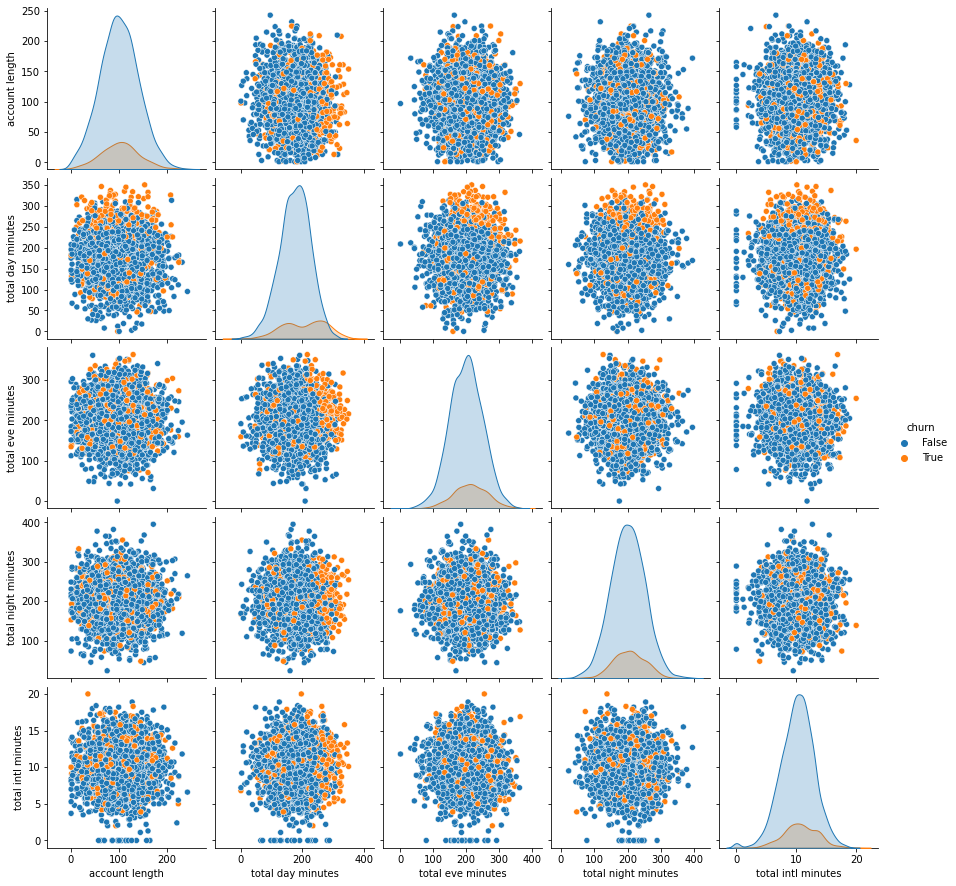

In [17]:
sns.pairplot(data, vars=['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], hue='churn')
plt.show()


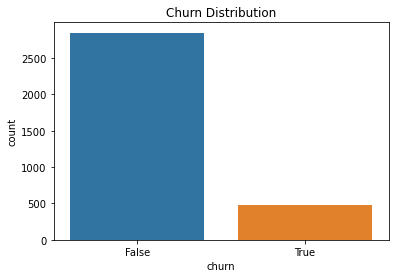

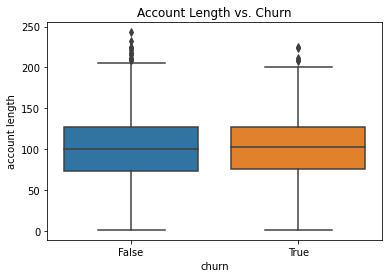

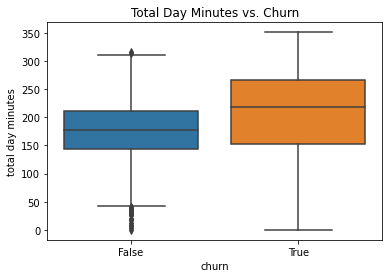

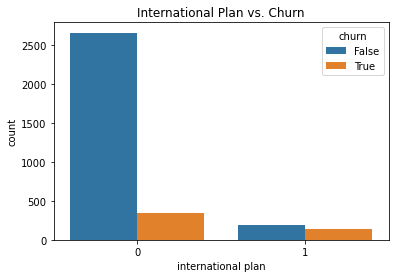

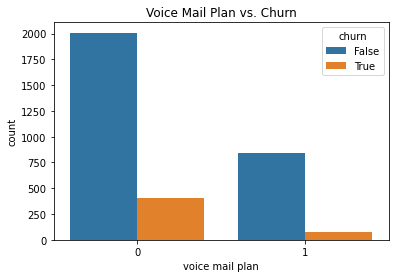

In [18]:
# Visualize the distribution of the target variable
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Explore the relationship between  features and churn
sns.boxplot(x='churn', y='account length', data=data)
plt.title('Account Length vs. Churn')
plt.show()

sns.boxplot(x='churn', y='total day minutes', data=data)
plt.title('Total Day Minutes vs. Churn')
plt.show()

sns.countplot(x='international plan', hue='churn', data=data)
plt.title('International Plan vs. Churn')
plt.show()

sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.title('Voice Mail Plan vs. Churn')
plt.show()



## Correlation Matrix

In [19]:
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

## Modelling 
## Baseline Model - Naive Bayes

In [20]:
#Converting Target Variable into Integers
data['churn'] = data['churn'].astype(int)
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [21]:
#Setting up the Target and Dataset
y = data['churn']
X = data.drop('churn', axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int32  
 2   voice mail plan         3333 non-null   int32  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [22]:
#Splitting Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

print(f'My training set is {X_train.shape}')
print(f'My final test set is {X_test.shape}')
print(f'My training set dependent variable is {y_train.shape}')
print(f'My test set dependent variable is {y_test.shape}')


My training set is (2333, 17)
My final test set is (1000, 17)
My training set dependent variable is (2333,)
My test set dependent variable is (1000,)


In [23]:
# baseline model using bayes naive learner

# setting up the learner
gnb = GaussianNB()

# fitting the model and predict
model_naive = gnb.fit(X_train, y_train)

y_pred = model_naive.predict_proba(X_train)[:,1]
# y_pred_50 = model_naive.predict(X_train)
# len(y_pred)
# model_naive 

roc_auc_score (y_train, y_pred)

0.8433266432513798

In [24]:
# Baseline Performance Evaluation Naive Bayes
# Instantiate a stratified k-fold object
skf = StratifiedKFold(n_splits=10, shuffle=True)

param_grid = {'var_smoothing': [1e-09]}

# GridSearchCV for hyperparameter tuning
opt_model_base = GridSearchCV(model_naive,
                              param_grid,
                              cv=skf,
                              scoring='roc_auc',
                              return_train_score=True)

# Fit the model with GridSearchCV
opt_model_base.fit(X_train, y_train)

# Display the GridSearchCV results
opt_model_base.cv_results_

# The validation baseline ROC AUC score mean and std
validation_mean_score = opt_model_base.cv_results_['mean_test_score'][0]
validation_std_score = opt_model_base.cv_results_['std_test_score'][0]

# The training baseline ROC AUC score mean and std
training_mean_score = opt_model_base.cv_results_['mean_train_score'][0]
training_std_score = opt_model_base.cv_results_['std_train_score'][0]

print("The validation baseline roc_auc score is mean {:.4f} std {:.4f}".format(validation_mean_score, validation_std_score))
print("The training baseline roc_auc_score is mean {:.4f} std {:.4f}".format(training_mean_score, training_std_score))

# Convert the CV results into a DataFrame
pd.DataFrame(opt_model_base.cv_results_)


The validation baseline roc_auc score is mean 0.8347 std 0.0419
The training baseline roc_auc_score is mean 0.8437 std 0.0039


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.005614      0.002505         0.007155        0.005596   

  param_var_smoothing                    params  split0_test_score  \
0               1e-09  {'var_smoothing': 1e-09}           0.896324   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.883382           0.859853           0.791901  ...   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.842727            0.850201            0.845525   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.847181            0.838962            0.846941   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0             0.84286            0.846125          0.843741         0.003924  

[1 rows x 31 columns]

## Hyperparameter Tuning on 3 Classification Models

## Decision Tree and Hyperparameter Tuning

In [25]:
# Set up the learner
model_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=40, class_weight='balanced')

In [26]:
# Fit the model
model_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_leaf=10, random_state=40)

In [27]:
# Perform training/validation test with the stratified k-fold object and fixed parameters
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=600)
param_grid = {'max_depth': [2], 'min_samples_leaf': [10]}

basic_model_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=40, class_weight='balanced'),
    param_grid,
    cv=skf,
    scoring='roc_auc',
    return_train_score=True
)

basic_model_tree.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=600, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=40),
             param_grid={'max_depth': [2], 'min_samples_leaf': [10]},
             return_train_score=True, scoring='roc_auc')

In [28]:
# Print results of unoptimized model
unoptimized_mean_test_score = basic_model_tree.cv_results_['mean_test_score'][0]
unoptimized_std_test_score = basic_model_tree.cv_results_['std_test_score'][0]
unoptimized_mean_train_score = basic_model_tree.cv_results_['mean_train_score'][0]
unoptimized_std_train_score = basic_model_tree.cv_results_['std_train_score'][0]

print(f"The validation unoptimized Decision Tree roc_auc score is mean {unoptimized_mean_test_score:.4f} "
      f"std {unoptimized_std_test_score:.3f}")
print(f"The training unoptimized Decision Tree roc_auc_score is mean {unoptimized_mean_train_score:.4f} "
      f"std {unoptimized_std_train_score:.3f}")



The validation unoptimized Decision Tree roc_auc score is mean 0.7443 std 0.063
The training unoptimized Decision Tree roc_auc_score is mean 0.7637 std 0.013


In [29]:
# Apply hyperparameter optimization
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)
param_grid = {'max_depth': range(1, 15), 'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45]}

opt_model_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=40, class_weight='balanced'),
    param_grid,
    cv=skf,
    scoring='roc_auc',
    return_train_score=True
)

opt_model_tree.fit(X_train, y_train)

# Get results of hyperparameter optimization
opt_model_tree_results = pd.DataFrame(opt_model_tree.cv_results_)
opt_model_tree_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.007153      0.001516         0.004285        0.001091   
1         0.006743      0.000698         0.003912        0.000865   
2         0.008634      0.000629         0.003483        0.000498   
3         0.007474      0.001548         0.003581        0.000653   
4         0.007002      0.002289         0.003086        0.000712   
..             ...           ...              ...             ...   
121       0.026575      0.005400         0.004379        0.000636   
122       0.025106      0.002173         0.003736        0.000862   
123       0.023904      0.003362         0.004564        0.001102   
124       0.029983      0.006295         0.005234        0.001314   
125       0.029810      0.003941         0.005087        0.001133   

    param_max_depth param_min_samples_leaf  \
0                 1                      5   
1                 1                     10   
2                 1                     15   
3                 1                     20   
4                 1                     25   
..              ...                    ...   
121              14                     25   
122              14                     30   
123              14                     35   
124              14                     40   
125              14                     45   

                                        params  split0_test_score  \
0      {'max_depth': 1, 'min_samples_leaf': 5}           0.545735   
1     {'max_depth': 1, 'min_samples_leaf': 10}           0.545735   
2     {'max_depth': 1, 'min_samples_leaf': 15}           0.545735   
3     {'max_depth': 1, 'min_samples_leaf': 20}           0.545735   
4     {'max_depth': 1, 'min_samples_leaf': 25}           0.545735   
..                                         ...                ...   
121  {'max_depth': 14, 'min_samples_leaf': 25}           0.752647   
122  {'max_depth': 14, 'min_samples_leaf': 30}           0.731765   
123  {'max_depth': 14, 'min_samples_leaf': 35}           0.710294   
124  {'max_depth': 14, 'min_samples_leaf': 40}           0.692941   
125  {'max_depth': 14, 'min_samples_leaf': 45}           0.666324   

     split1_test_score  split2_test_score  ...  split2_train_score  \
0             0.562941           0.543529  ...            0.625586   
1             0.562941           0.543529  ...            0.625586   
2             0.562941           0.543529  ...            0.625586   
3             0.562941           0.543529  ...            0.625586   
4             0.562941           0.543529  ...            0.625586   
..                 ...                ...  ...                 ...   
121           0.885000           0.856471  ...            0.955627   
122           0.893235           0.874044  ...            0.952396   
123           0.897574           0.878529  ...            0.945820   
124           0.891912           0.854559  ...            0.936095   
125           0.883309           0.851912  ...            0.933573   

     split3_train_score  split4_train_score  split5_train_score  \
0              0.633943            0.621494            0.658054   
1              0.633943            0.621494            0.658054   
2              0.633943            0.621494            0.658054   
3              0.633943            0.621494            0.658054   
4              0.633943            0.621494            0.658054   
..                  ...                 ...                 ...   
121            0.956753            0.958012            0.954929   
122            0.952141            0.950347            0.949712   
123            0.949321            0.946394            0.942566   
124            0.944750            0.933989            0.934617   
125            0.931662            0.928084            0.928221   

     split6_train_score  split7_train_score  split8_train_score  \
0              0.640479            0.632550            0.650846   
1             

In [30]:

# Print best hyperparameters and roc_auc score
best_hyperparameters = opt_model_tree.best_params_
best_roc_auc_score = opt_model_tree.best_score_

print("Values of the optimized hyperparameters for the best model found:")
print(best_hyperparameters)
print(f"Best roc_auc score: {best_roc_auc_score:.4f}")


Values of the optimized hyperparameters for the best model found:
{'max_depth': 6, 'min_samples_leaf': 35}
Best roc_auc score: 0.8852


## Random Forest Classifier and Hyperparameters Tuning

In [31]:
# setting up the learner and fitting
model_random_forest = RandomForestClassifier(n_estimators=100, 
                                             random_state = 11, 
                                             class_weight= 'balanced',
                                             max_depth = 15,
                                             min_samples_leaf= 20 
                                             )
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=20, random_state=11)

In [32]:
#  estimating initial performance with only two fixed parameters max_depth 15 and min_sample_leaf 20

skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

param_grid = {'max_depth': [15], 'min_samples_leaf': [20] }

basic_model_random = GridSearchCV(RandomForestClassifier(random_state=11, class_weight='balanced', n_estimators=100),
                         param_grid,       
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

# fitting the initial model
basic_model_random.fit(X_train,y_train)

basic_model_random.cv_results_

{'mean_fit_time': array([0.5816668]),
 'std_fit_time': array([0.10194398]),
 'mean_score_time': array([0.01821756]),
 'std_score_time': array([0.00192514]),
 'param_max_depth': masked_array(data=[15],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[20],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 15, 'min_samples_leaf': 20}],
 'split0_test_score': array([0.78926471]),
 'split1_test_score': array([0.88852941]),
 'split2_test_score': array([0.89882353]),
 'split3_test_score': array([0.8854567]),
 'split4_test_score': array([0.91146911]),
 'split5_test_score': array([0.92004138]),
 'split6_test_score': array([0.9256577]),
 'split7_test_score': array([0.90999113]),
 'split8_test_score': array([0.85648832]),
 'split9_test_score': array([0.90319243]),
 'mean_test_score': array([0.88889144]),
 'std_test_score': array([0.03816748]),
 'rank_test_score': arr

In [33]:
print('The validation unoptimized Random Forest Tree roc_auc score Mean:', 0.89681503)
print('The validation unoptimized Random Forest Tree roc_auc score Std:', 0.02881622)
print('The training unoptimized Random Forest Tree roc_auc_score Mean:', 0.97061469)
print('The training unoptimized Random Forest Tree roc_auc_score Std:', 0.0010613)


The validation unoptimized Random Forest Tree roc_auc score Mean: 0.89681503
The validation unoptimized Random Forest Tree roc_auc score Std: 0.02881622
The training unoptimized Random Forest Tree roc_auc_score Mean: 0.97061469
The training unoptimized Random Forest Tree roc_auc_score Std: 0.0010613


In [34]:
# applying hyperparameter optimisations
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

param_grid = {'max_depth': range(1,15), 'min_samples_leaf': [5,10,15,20,25]}

# change all the parameters in the GridSearch CV!
opt_model_forest = GridSearchCV(RandomForestClassifier(random_state=11, class_weight='balanced',n_estimators=100),
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)
# fitting the optimal model
opt_model_forest.fit(X_train,y_train)

# turning the GridSearch CV into a dataframe
pd.DataFrame(opt_model_forest.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.248725      0.040809         0.017677        0.004038   
1        0.240521      0.027779         0.016831        0.002476   
2        0.303449      0.046174         0.020167        0.003214   
3        0.272364      0.040460         0.019104        0.001945   
4        0.261067      0.034273         0.019154        0.002617   
..            ...           ...              ...             ...   
65       0.757148      0.063249         0.022243        0.002534   
66       0.649857      0.063875         0.019549        0.002520   
67       0.597233      0.069192         0.019256        0.002888   
68       0.627189      0.057353         0.020652        0.002819   
69       0.617044      0.010589         0.021643        0.001792   

   param_max_depth param_min_samples_leaf  \
0                1                      5   
1                1                     10   
2                1                     15   
3                1                     20   
4                1                     25   
..             ...                    ...   
65              14                      5   
66              14                     10   
67              14                     15   
68              14                     20   
69              14                     25   

                                       params  split0_test_score  \
0     {'max_depth': 1, 'min_samples_leaf': 5}           0.750588   
1    {'max_depth': 1, 'min_samples_leaf': 10}           0.750588   
2    {'max_depth': 1, 'min_samples_leaf': 15}           0.750588   
3    {'max_depth': 1, 'min_samples_leaf': 20}           0.750588   
4    {'max_depth': 1, 'min_samples_leaf': 25}           0.750588   
..                                        ...                ...   
65   {'max_depth': 14, 'min_samples_leaf': 5}           0.784118   
66  {'max_depth': 14, 'min_samples_leaf': 10}           0.802941   
67  {'max_depth': 14, 'min_samples_leaf': 15}           0.801765   
68  {'max_depth': 14, 'min_samples_leaf': 20}           0.789853   
69  {'max_depth': 14, 'min_samples_leaf': 25}           0.781324   

    split1_test_score  split2_test_score  ...  split2_train_score  \
0            0.775956           0.851985  ...            0.862237   
1            0.775956           0.851985  ...            0.862237   
2            0.775956           0.851985  ...            0.862237   
3            0.775956           0.851985  ...            0.862237   
4            0.775956           0.851985  ...            0.862237   
..                ...                ...  ...                 ...   
65           0.908529           0.913824  ...            0.997654   
66           0.894706           0.906324  ...            0.990074   
67           0.896912           0.911176  ...            0.978631   
68           0.887941           0.898676  ...            0.969518   
69           0.879118           0.895441  ...            0.961459   

    split3_train_score  split4_train_score  split5_train_score  \
0             0.857272            0.857653            0.843460   
1             0.857272            0.857653            0.843460   
2             0.857272            0.857653            0.843460   
3             0.857272            0.857653            0.843460   
4             0.857272            0.857653            0.843460   
..                 ...                 ...                 ...   
65            0.997313            0.997661            0.997368   
66            0.988892            0.990021            0.988522   
67            0.978629            0.977897            0.977924   
68            0.968482            0.968382            0.967894   
69            0.958416            0.959824            0.958618   

    split6_train_score  split7_train_score  split8_train_score  \
0             0.855991            0.844419            0.845728   
1             0.855991            0.844419            0.845728   
2        

In [35]:
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model_forest.best_params_)
opt_model_forest.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'max_depth': 11, 'min_samples_leaf': 5}


0.9025922258350576

## Logistic Regression

In [36]:
# Setting up the learner and fitting the model
log_model = LogisticRegression(class_weight='balanced', penalty='l2', random_state=15, solver='liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=15, solver='liblinear')

In [37]:
# Defining the cross-validation strategy
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

# Defining the parameter grid for grid search
param_grid = {'penalty': ['l2']}

# Creating a grid search object with logistic regression model
basic_model_logistic = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=15, solver='liblinear'),
                                    param_grid,
                                    cv=skf,
                                    scoring='roc_auc',
                                    return_train_score=True)

# Fitting the initial model
basic_model_logistic.fit(X_train, y_train)

# Accessing the cross-validation results
basic_model_logistic.cv_results_

{'mean_fit_time': array([0.0415997]),
 'std_fit_time': array([0.00286817]),
 'mean_score_time': array([0.00464635]),
 'std_score_time': array([0.00089205]),
 'param_penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l2'}],
 'split0_test_score': array([0.71676471]),
 'split1_test_score': array([0.81544118]),
 'split2_test_score': array([0.80514706]),
 'split3_test_score': array([0.8381614]),
 'split4_test_score': array([0.85087201]),
 'split5_test_score': array([0.7970736]),
 'split6_test_score': array([0.79677801]),
 'split7_test_score': array([0.83993497]),
 'split8_test_score': array([0.84274313]),
 'split9_test_score': array([0.7970736]),
 'mean_test_score': array([0.80999897]),
 'std_test_score': array([0.03699565]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.83141957]),
 'split1_train_score': array([0.82059862]),
 'split2_train_score': array([0.81979484]),
 'split3_train_

In [38]:
print('The validation unoptimized Random Forest Tree roc_auc score Mean:', 0.81430751)
print('The validation unoptimized Random Forest Tree roc_auc score Std:', 0.03516499)
print('The training unoptimized Random Forest Tree roc_auc_score Mean:', 0.8229525)
print('The training unoptimized Random Forest Tree roc_auc_score Std:', 0.00390355)


The validation unoptimized Random Forest Tree roc_auc score Mean: 0.81430751
The validation unoptimized Random Forest Tree roc_auc score Std: 0.03516499
The training unoptimized Random Forest Tree roc_auc_score Mean: 0.8229525
The training unoptimized Random Forest Tree roc_auc_score Std: 0.00390355


In [39]:
# hyperparameter tuning on Logistic regression
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]
             }

opt_model_logistic = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=15, solver='liblinear'),
                                 param_grid,
                                 cv=skf,
                                 scoring='roc_auc',
                                 return_train_score=True)

# Fitting the optimal model
opt_model_logistic.fit(X_train, y_train)

pd.DataFrame(opt_model_logistic.cv_results_)


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.017606      0.002038         0.006479        0.004707   0.001   
1        0.019684      0.001186         0.004639        0.001099   0.001   
2        0.041615      0.014025         0.005627        0.001511    0.01   
3        0.027756      0.002878         0.004889        0.001515    0.01   
4        0.220315      0.011859         0.004380        0.000613     0.1   
5        0.035229      0.003587         0.004463        0.000598     0.1   
6        2.365755      0.163641         0.004782        0.000973       1   
7        0.038315      0.001195         0.004296        0.000780       1   
8        3.507452      1.120458         0.005002        0.001264      10   
9        0.058842      0.009954         0.007880        0.004074      10   
10       2.796618      1.556143         0.005681        0.001800     100   
11       0.065042      0.017495         0.005184        0.001237     100   

   param_penalty                         params  split0_test_score  \
0             l1  {'C': 0.001, 'penalty': 'l1'}           0.551618   
1             l2  {'C': 0.001, 'penalty': 'l2'}           0.621176   
2             l1   {'C': 0.01, 'penalty': 'l1'}           0.632059   
3             l2   {'C': 0.01, 'penalty': 'l2'}           0.666618   
4             l1    {'C': 0.1, 'penalty': 'l1'}           0.704559   
5             l2    {'C': 0.1, 'penalty': 'l2'}           0.703382   
6             l1      {'C': 1, 'penalty': 'l1'}           0.719559   
7             l2      {'C': 1, 'penalty': 'l2'}           0.716765   
8             l1     {'C': 10, 'penalty': 'l1'}           0.719118   
9             l2     {'C': 10, 'penalty': 'l2'}           0.719706   
10            l1    {'C': 100, 'penalty': 'l1'}           0.718676   
11            l2    {'C': 100, 'penalty': 'l2'}           0.718676   

    split1_test_score  split2_test_score  ...  split2_train_score  \
0            0.580882           0.645735  ...            0.621187   
1            0.724412           0.667500  ...            0.735134   
2            0.752647           0.676618  ...            0.753905   
3            0.777206           0.706029  ...            0.776216   
4            0.805000           0.789118  ...            0.809038   
5            0.804412           0.776176  ...            0.805227   
6            0.817206           0.810147  ...            0.821368   
7            0.815441           0.805147  ...            0.819795   
8            0.817794           0.811324  ...            0.821645   
9            0.818235           0.810882  ...            0.821674   
10           0.817941           0.811618  ...            0.821690   
11           0.817500           0.810441  ...            0.822091   

    split3_train_score  split4_train_score  split5_train_score  \
0             0.615325            0.607674            0.631049   
1             0.722118            0.722925            0.729802   
2             0.748535            0.752282            0.758141   
3             0.769797            0.771010            0.776521   
4             0.809549            0.806579            0.813002   
5             0.802996            0.802661            0.807669   
6             0.820334            0.817919            0.822502   
7             0.818904            0.816718            0.821491   
8             0.820400            0.818309            0.822828   
9             0.820449            0.818349            0.822817   
10            0.820389            0.818372            0.822797   
11            0.821083            0.818937            0.823200   

    split6_train_score  split7_train_score  split8_train_score  \
0             0.624527            0.627644            0.623609   
1             0.732944            0.720523            0.720962   
2             0.750709            0.742766            0.749342   
3             0.775590            0.767231            0.769074   
4             0.8

In [40]:
print('Values of the optimized hyperparameters for the best model found:')
print(opt_model_logistic.best_params_)
print('Best ROC AUC score: {:.4f}'.format(opt_model_logistic.best_score_))


Values of the optimized hyperparameters for the best model found:
{'C': 10, 'penalty': 'l1'}
Best ROC AUC score: 0.8116


## Evaluation of The Winning Model - Desicion Tree

Based on the performance of the models, it appears that the Decision Tree classifier outperforms the Random Forest classifier. Although the difference in ROC scores is not significant, we have decided to adopt the Decision Tree as our final model due to its higher interpretability.

### Estimating the underlying costs for TP, FP, TN and FN
The average cost for telco prospecting in the US is around 315 US dollars made up of marketing initiatives dedicated to make our prospects convert. Retaining an existing customer (and generally speaking keeping them satisfied) is roughly 5 times cheaper with an estimate of $60 per customer. Below costs associated to each scenario.

FN = That would be when the model predicted the user wouldn't churn when they actually would. After some research we have found that the cost per acquisition of a new customer to replace the lost one is around $315. This is the most expensive scenario and what Syriatel wants to avoid the most.

TP = In this case, model would predict that the customer is churning when they actually would and we need to spend $60 to keep them happy.

FP = Model is predicting that the customer would churn but in reality, they wouldn't. We still spend $60 to keep them happy.

TN = This is the scenario with less impact as we are corretly identifying happy customers ($0).

The m (Metz) parameter that we need to calculate the ideal threshold is given by the following formula:

In [41]:
prevalence = .22
FN = 315
TP = 60
FP = 60
TN = 0

m = ((1.0 - prevalence)/(prevalence)) * ((60-0)/(315-60))
print(f'Metz parameter is {m} ')

Metz parameter is 0.8342245989304813 


Identifying optimal threshold given our Metz value

In [42]:
# refitting my best model with optimal max_depth 5 and min_sample_leafs 35

model_tree_f = DecisionTreeClassifier(max_depth=5,min_samples_leaf=35,random_state=39, class_weight = 'balanced' )
# fitting the model
model_tree_f.fit(X_train, y_train)

# TESTING ON TEST DATA, good results
y_hat_decision_tree = model_tree_f.predict_proba(X_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_decision_tree)


# good roc score on test dataset
roc_auc_score(y_test, y_hat_decision_tree)

0.9093397850690733

In [43]:
# Calculating the F-Measure and Thresholds
fm_list = (tpr_test) -(m*(fpr_test))
list(zip(fm_list.tolist(), thresholds_test.tolist()))

[(0.0, 1.9969078259287891),
 (0.1039216806256411, 0.996907825928789),
 (0.24980140320932417, 0.9907804944185836),
 (0.33079721431701664, 0.9903457088095408),
 (0.4617174986452219, 0.9214054553860379),
 (0.5009343049016328, 0.8978825649496921),
 (0.5603357449743612, 0.8808235670634135),
 (0.6255777306638725, 0.8259428097803564),
 (0.7028588818004701, 0.8022990562240014),
 (0.7111833872764616, 0.6532760316130677),
 (0.7434071865398656, 0.4290635091496232),
 (0.7311107452503568, 0.3695531244205451),
 (0.7623611202442969, 0.3476364904936333),
 (0.7128955196084031, 0.26967052296867594),
 (0.338507809713795, 0.17837644321131577),
 (0.31240439154503263, 0.07432961623093275),
 (0.1657754010695187, 0.06271831828051735)]

### Plotting Winning Decision Tree Model ROC Curve

In [44]:
# evaluating TPRs, FPRs and thresholds for both the training and test sets
base_pred_train = model_tree_f.predict_proba(X_train)[:,1]
base_fpr_train, base_tpr_train, base_thresh_train = roc_curve(y_train, base_pred_train)

y_hat_decision_tree = model_tree_f.predict_proba(X_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_decision_tree)

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

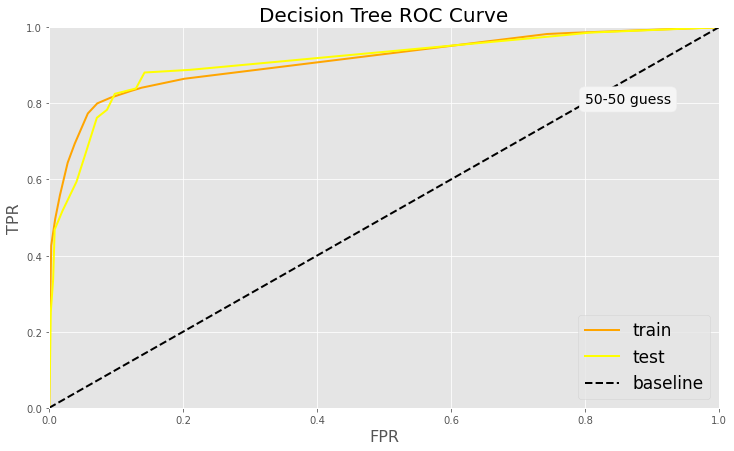

In [74]:

# Plotting the ROC Curve

plt.style.use('ggplot')
plt.figure(figsize=(12,7))
ax1 = sns.lineplot(base_fpr_train, base_tpr_train, label='train',)
ax1.lines[0].set_color("orange")
ax1.lines[0].set_linewidth(2)

ax2 = sns.lineplot(fpr_test, tpr_test, label='test')
ax2.lines[1].set_color("yellow")
ax2.lines[1].set_linewidth(2)

ax3 = sns.lineplot([0,1], [0,1], label='baseline')
ax3.lines[2].set_linestyle("--")
ax3.lines[2].set_color("black")
ax3.lines[2].set_linewidth(2)

plt.title('Decision Tree ROC Curve', fontsize=20)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)
plt.text(x=0.8, y=0.8, s="50-50 guess", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))

plt.legend(loc=4, fontsize=17)
plt.show();

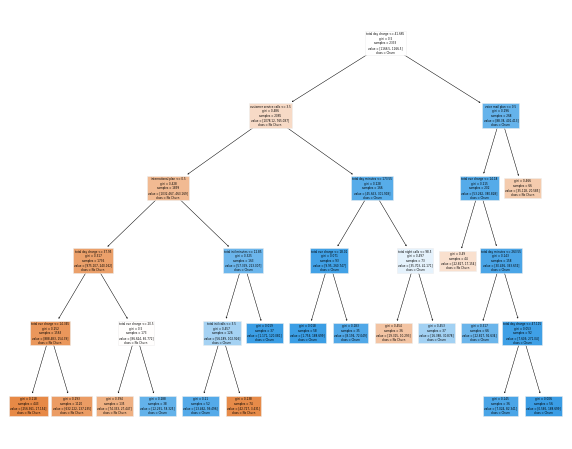

In [55]:
# Visualizing Decision Tree

from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8))
plot_tree(model_tree_f, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'])
plt.show()

### Plotting Confusion Matrix for selected threshold

In [56]:
# creating a new list with threshold 0.53 separating churn 1 and non-churn 0
probs_list_test = model_tree_f.predict_proba(X_test)[:,1]

final_res =[]
for x in probs_list_test:
    if x > 0.3476364904936333:
        final_res.append(1)
    else:
        final_res.append(0)
final_res
len(final_res)

1000

In [57]:
# plotting the confusion matrix for the .53 threshold
confusion_matrix(y_test, final_res)

array([[746, 111],
       [ 23, 120]], dtype=int64)

In [58]:
# listing all the TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, final_res).ravel()
tn, fp, fn, tp

(746, 111, 23, 120)

In [59]:
# evaluating performance on this specific confusion matrix
accuracy = print('Accuracy Score', accuracy_score(y_test, final_res))
roc_score = print('ROC_score ', roc_auc_score(y_test, y_hat_decision_tree))
precision = print('Precision ', precision_score(y_test, final_res))
recall= print('Recall or TPR ', recall_score(y_test, final_res))
f1__score = print('F1 score ', f1_score(y_test, final_res))

# power
# alpha
# precision

Accuracy Score 0.866
ROC_score  0.9093397850690733
Precision  0.5194805194805194
Recall or TPR  0.8391608391608392
F1 score  0.6417112299465241


In [60]:
# additional metrics including Type I error (alpha), statistical power (1-Beta)
alpha = 111/ (111 + 746)
print("alpha = ", alpha)

power = 120/(120 + 23)
print("power = ", power)

precision = 120/(120 +111)
print("precision = ", precision)

accuracy = (746 + 120 )/(111+ 23 + 746 + 120)
print("accuracy = ", accuracy)

alpha =  0.1295215869311552
power =  0.8391608391608392
precision =  0.5194805194805194
accuracy =  0.866


* The alpha value represents the probability of our model falsely predicting that a customer will churn when they actually wouldn't. This misclassification occurs approximately once in every ten predictions.

* The power of our model refers to its ability to accurately identify customers who are likely to churn, achieving a correct prediction rate of 80% out of all churn instances.

Although our model correctly predicts churn for only half of the customers it identifies, it prioritizes minimizing potential losses by erring on the side of caution. The cost of incorrectly identifying a non-churning customer is $60, while failing to recognize an impending churn results in five times higher marketing expenditure. Fortunately, this failure to identify churn only occurs in approximately two out of ten customers (miss rate or 1 minus beta).

Our model achieves around 90% accuracy rate in correctly identifying both churn and non-churn customers.

### How much money could this model save you?

### Pre-Model Loss

We know churn rate is overall 14%. Out of a thousand people in a pre-model scenario, that would incur in the cost of losing 144 customers without doing anything about it ad thus having to spend `$ 315 for each of their replacements.

Total Loss for Churning Customers > 144 x 315 = $ 45,360

### After-Model Loss

Out of the same 1000 people sample we would still mistakenly think that 23 people would not churn when they will (total cost 31523 = 7245). At the same time this model would make you mistakenly spend spend 60 111 = 6660 on people we thought would churn but they won't. Lastly, it would correctly take preventive measures and spend the 60 marketing on 114 people who were actually about to churn and we will try to retain (60 *120).

Summing all the costs above > 7245 + 6000 + 7200 = $ 20,445

We would be saving on average (45,360 - 20,445) *$24,915* per 1000 customers

### Understanding Features Importance

In [61]:
# listing all the decision tree coefficients
model_tree_f.feature_importances_

array([0.        , 0.24420359, 0.03817875, 0.        , 0.03996007,
       0.        , 0.24514141, 0.        , 0.        , 0.07479717,
       0.        , 0.00510119, 0.        , 0.02435269, 0.06393326,
       0.        , 0.26433187])

In [63]:
# creating a zip obejct with column names and decision tree coefficients
all_coef = dict(zip(data.columns, model_tree_f.feature_importances_ ))
all_coef

{'account length': 0.0,
 'international plan': 0.2442035905919021,
 'voice mail plan': 0.03817875128415697,
 'number vmail messages': 0.0,
 'total day minutes': 0.039960070755545044,
 'total day calls': 0.0,
 'total day charge': 0.2451414096392877,
 'total eve minutes': 0.0,
 'total eve calls': 0.0,
 'total eve charge': 0.07479717265040517,
 'total night minutes': 0.0,
 'total night calls': 0.005101187869800938,
 'total night charge': 0.0,
 'total intl minutes': 0.024352685207632112,
 'total intl calls': 0.06393325759355394,
 'total intl charge': 0.0,
 'customer service calls': 0.264331874407716}

In [64]:
# converting column names into a list and slicing the last column 'churn' out
x = list(data.columns)
x = x[:-1]
x

['account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [65]:
# created a dataframe for all the relevant columns names for features
df_feature_importance = pd.DataFrame(model_tree_f.feature_importances_, columns=['feature importance'])
df_feature_importance

second_ = pd.DataFrame(x, columns=['feature'])
second_

feature
0           account length
1       international plan
2          voice mail plan
3    number vmail messages
4        total day minutes
5          total day calls
6         total day charge
7        total eve minutes
8          total eve calls
9         total eve charge
10     total night minutes
11       total night calls
12      total night charge
13      total intl minutes
14        total intl calls
15       total intl charge
16  customer service calls

In [66]:
second_ = pd.DataFrame(x, columns=['feature'])
second_

feature
0           account length
1       international plan
2          voice mail plan
3    number vmail messages
4        total day minutes
5          total day calls
6         total day charge
7        total eve minutes
8          total eve calls
9         total eve charge
10     total night minutes
11       total night calls
12      total night charge
13      total intl minutes
14        total intl calls
15       total intl charge
16  customer service calls

In [67]:
# creating a dataframe with feature names and importance combined 
mini_df_features = pd.concat([second_, df_feature_importance], axis = 1)
ordered = mini_df_features.sort_values(by ='feature importance', ascending = False).reset_index()

ordered.drop('index', axis =1)

feature  feature importance
0   customer service calls            0.264332
1         total day charge            0.245141
2       international plan            0.244204
3         total eve charge            0.074797
4         total intl calls            0.063933
5        total day minutes            0.039960
6          voice mail plan            0.038179
7       total intl minutes            0.024353
8        total night calls            0.005101
9        total intl charge            0.000000
10      total night charge            0.000000
11          account length            0.000000
12     total night minutes            0.000000
13       total eve minutes            0.000000
14         total day calls            0.000000
15   number vmail messages            0.000000
16         total eve calls            0.000000

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


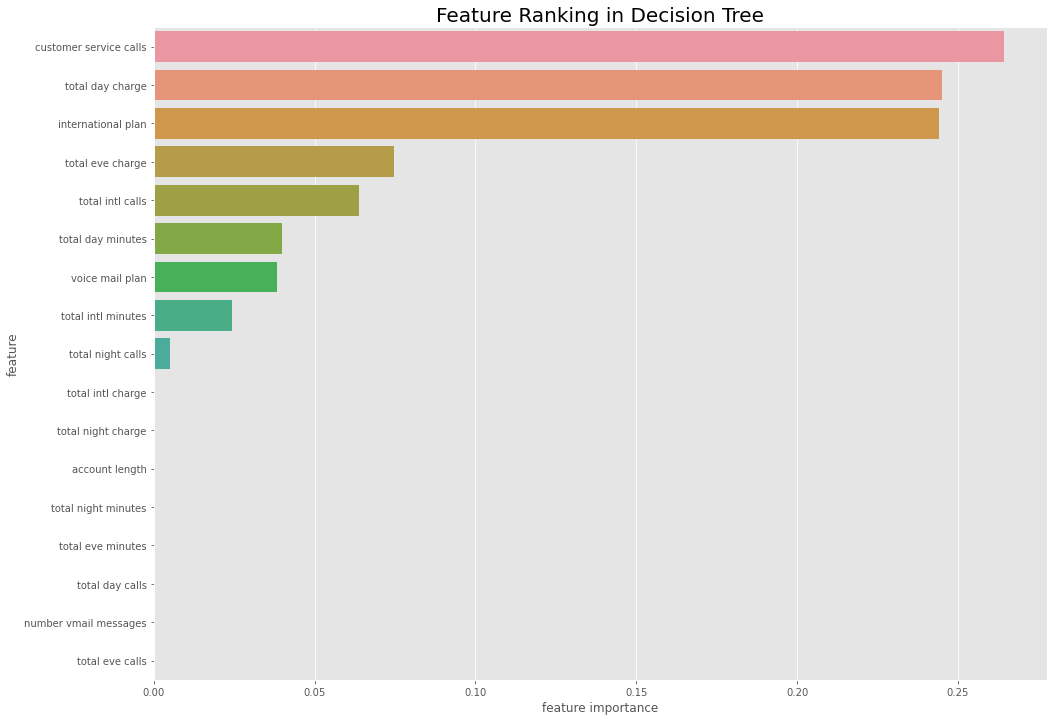

In [68]:
# plotting the decision tree importance features
plt.figure(figsize=(16,12))
sns.barplot(ordered['feature importance'],
            ordered['feature'], 
            orient = 'h',
            )

plt.title ('Feature Ranking in Decision Tree', fontsize = 20)

plt.show()

### Sample Customers
After training the model, tuning hyperparameters, and selecting thresholds, we can examine the insights provided by these predictions regarding the underlying factors. To do so, we will randomly select an observation from our dataset as our "baseline customer" and analyze how altering the top three features influences the churn probability for our customers.

These modifications represent the potential impact of interventions on SyriaTel's customers. These interventions encompass various strategies such as marketing campaigns, loyalty rewards, price reductions, or any other incentives aimed at encouraging existing customers to retain their loyalty to the company.

In [69]:
# Ease of life functions


# function that takes in the example variables as one row of a dataframe and outputs a probability predictions of churning
# before and after the changes, as well as the change in probability as a relative difference
def prediction(x):
    prediction = model_tree_f.predict_proba(x)[:,1]
    prob1 = prediction[0]*100
    prob2 = prediction[1]*100
    perc_diff = ((prob2 - prob1)/prob1) *100
    
    if perc_diff <= 0:
        symbol = ''
    else: 
        symbol = '+'
        
    return print(f'Original predicted probability of this customer churning:', '\n'
                 f'{ round(prob1,2) }%', '\n', '\n',
                 f'New predicted probability of this customer churning:', '\n', 
                 f'{ round(prob2,2) }%', '\n', '\n',
                 f'Percentage difference:', '\n', 
                 f'{symbol}{ round(perc_diff,2) }%')




#function creates a dataframe with 2 identical rows by duplicating an arbitrarily chosen observation
#this will form the basis for the before and after comparisons made below
def fresh_comparison():
    # Randomly chosen row in the data, acting as an example customer
    example1 = list(X_train.loc[2,:]) 

    # example customer being duplicated and both placed in a df
    examples_df = pd.DataFrame([example1, example1],
                               columns=X_train.columns,
                               index=['customer 1', 'customer 2']) 
    return examples_df





#function that outputs a slice of the customer comparison dataframe showing the difference in values
def print_summary(feature):
    return print(examples_df[[feature]], '\n',
                 '(All other variables are controlled for i.e they\'re identical)', '\n',
                 '------------------------------------------------------------------', '\n'
                )

What happens if a customer makes more (or less) customer service calls?

In [70]:
# new dataframe of identical rows i.e customers
examples_df = fresh_comparison() 


# new duplicated example customer now with 4 more customer service calls made
examples_df.loc['customer 2', 'customer service calls'] += 2


print_summary('customer service calls')
prediction(examples_df)

            customer service calls
customer 1                     0.0
customer 2                     2.0 
 (All other variables are controlled for i.e they're identical) 
 ------------------------------------------------------------------ 

Original predicted probability of this customer churning: 
26.97% 
 
 New predicted probability of this customer churning: 
 26.97% 
 
 Percentage difference: 
 0.0%


In [71]:
# new dataframe of identical rows i.e customers
examples_df = fresh_comparison() 


# new duplicated example customer now with 7 more customer service calls made
examples_df.loc['customer 2', 'customer service calls'] += 4


print_summary('customer service calls')
prediction(examples_df)

            customer service calls
customer 1                     0.0
customer 2                     4.0 
 (All other variables are controlled for i.e they're identical) 
 ------------------------------------------------------------------ 

Original predicted probability of this customer churning: 
26.97% 
 
 New predicted probability of this customer churning: 
 65.33% 
 
 Percentage difference: 
 +142.25%


In [72]:
# new dataframe of identical rows i.e customers
examples_df = fresh_comparison() 


# new duplicated example customer now with 7 more customer service calls made
examples_df.loc['customer 2', 'customer service calls'] += 6


print_summary('customer service calls')
prediction(examples_df)

            customer service calls
customer 1                     0.0
customer 2                     6.0 
 (All other variables are controlled for i.e they're identical) 
 ------------------------------------------------------------------ 

Original predicted probability of this customer churning: 
26.97% 
 
 New predicted probability of this customer churning: 
 65.33% 
 
 Percentage difference: 
 +142.25%


### Insights Breakdown:

In this analysis, we observe the impact of customer service calls on the probability of churn for a specific customer. When the number of customer service calls is between 0 and 3, the probability of churn remains constant at 26.97% for this particular customer. However, if the number of calls increases to 4 or more, the probability of churn rises significantly to 65.33%.

This difference can be attributed to the customer's level of comfort in reaching out for inquiries and the effectiveness of issue resolution. When a customer feels comfortable making calls and has their inquiries promptly resolved without recurring problems, the likelihood of churn remains relatively low. Conversely, if a customer needs to make multiple calls due to unresolved issues or a continuous emergence of new problems, the chances of losing that customer increase substantially.

Potential Solution: Implementing a marketing campaign that highlights SyriaTel's customer services as the friendliest and most approachable in the industry could help address this issue. By emphasizing the company's commitment to resolving customer inquiries efficiently and effectively, it may alleviate concerns and reduce the likelihood of customer churn.

What happens if the customers total day charge were to increase?

In [73]:
# new dataframe of identical rows i.e customers
examples_df = fresh_comparison() 


# new duplicated example customer now with 50% increase in total day charge
examples_df.loc['customer 2', 'total day charge']*= 1.5


print_summary('total day charge')
prediction(examples_df)

            total day charge
customer 1             41.38
customer 2             62.07 
 (All other variables are controlled for i.e they're identical) 
 ------------------------------------------------------------------ 

Original predicted probability of this customer churning: 
26.97% 
 
 New predicted probability of this customer churning: 
 42.91% 
 
 Percentage difference: 
 +59.11%


### Insights Breakdown:

Upon analysis, we observe an interesting trend where a 50% increase in the total price charged for a day results in a more significant decrease in the probability of a customer leaving. Initially, this may seem counterintuitive – one would expect that increasing the cost of services would potentially drive customers away. However, it's important to consider that the total day charge is influenced by both the price per minute and the duration of service usage.

Therefore, it is plausible to conclude that this decrease in the probability of churn is more accurately explained by an increase in the customer's usage of the services, rather than the price alone. As customers spend more time utilizing the services, their likelihood of churn diminishes, potentially indicating that they are deriving more value and satisfaction from the extended usage.

Potential Solution: To address customers identified as at risk of churning, a loyalty bonus program could be implemented. This program would reward customers with discounts on their monthly subscription fee if they surpass a certain threshold of service usage. For example, customers who spend more than three hours on the phone with another SyriaTel customer in a month could receive a 50% discount on their subscription fee for that month. This incentive would encourage increased usage, fostering customer loyalty and reducing the likelihood of churn.




